In [1]:
import matplotlib.pyplot as plt

In [2]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [3]:
import pandas as pd
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
from ast import literal_eval
df['job_skills'] = df['job_skills'].apply( lambda x : literal_eval(x) if pd.notna(x) else x)
df['job_type_skills'] = df['job_type_skills'].apply( lambda x : literal_eval(x) if pd.notna(x) else x)

In [5]:
df_da_india = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

In [6]:
df_da_india['job_posted_month_no'] = df_da_india['job_posted_date'].dt.month

In [7]:
df_da_india_explode = df_da_india.explode('job_skills')

In [8]:
df_da_india_pivot = df_da_india_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)
# Ah, excellent observation! You've identified the exact difference:
# Why this happens:

# aggfunc='size': Counts the number of rows in each group. Creates a simple column index → No company_name header
# aggfunc='count': Counts non-null values in ALL columns of the DataFrame. Creates a MultiIndex with column names → Shows company_name (and potentially other column names)

# What's happening with aggfunc='count':
# When you use aggfunc='count', pandas counts non-null values across all columns in your DataFrame. Since you didn't specify a values parameter, it's counting across multiple columns (like company_name, and possibly others), creating a multi-level column structure.

df_da_india_pivot

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,aurora,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,21,1,0,0,0,1,0,0,0,...,0,0,1,4,1,37,0,0,0,3
2,7,17,1,0,2,0,0,1,0,1,...,0,1,1,5,0,24,0,0,0,0
3,6,16,2,1,0,0,0,1,1,0,...,0,0,0,5,0,27,0,0,0,2
4,8,8,1,0,4,0,1,2,0,0,...,0,0,1,4,0,27,0,0,0,1
5,5,13,0,0,1,0,0,0,0,0,...,0,0,0,5,0,13,0,0,0,0
6,5,22,1,0,0,0,1,0,0,1,...,0,0,0,1,0,12,1,0,0,1
7,10,13,2,0,1,0,0,0,0,1,...,0,4,0,4,0,22,0,0,0,2
8,19,25,2,0,0,0,0,0,2,0,...,0,1,0,4,0,31,0,0,1,1
9,4,14,0,0,0,2,0,0,1,5,...,0,0,0,2,0,28,0,0,1,2


In [9]:
# Step 1: Add Total row with actual sum VALUES
df_da_india_pivot.loc['Total'] = df_da_india_pivot.sum()

# Step 2: Reorder columns using the sorted column NAMES
df_da_india_pivot = df_da_india_pivot[df_da_india_pivot.loc['Total'].sort_values(ascending=False).index]

# df_da_india_pivot.loc['Total'] = df_da_india_pivot.sum().sort_values(ascending= False).index]  --->You can't assign .index (column names) to a row that needs numerical values.
# Why your code fails:

# .index gives you ['sql', 'python', 'excel', ...] (text labels)
# But the Total row needs [6318, 4406, 4234, ...] (numbers)
# You're trying to put column names where numbers should go!


df_da_india_pivot = df_da_india_pivot.drop('Total')

# df_da_india_pivot = df_da_india_pivot.iloc[:,:5]
df_da_india_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


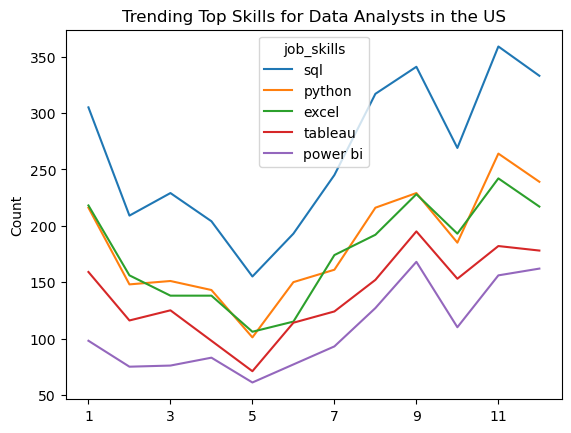

In [10]:
df_da_india_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [11]:
# Get monthly totals
DA_totals = df_da_india.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

In [12]:
# divide first 12 rows of df_DA_pivot by DA_totals --- Alternative
# df_DA_US_percent = df_da_india_pivot.iloc[:12].div(DA_totals/100, axis=0)


# Create a copy and convert to float dtype
df_da_india_percent = df_da_india_pivot.iloc[:12].copy().astype(float)

# Now loop and assign percentages
for i in range(12):
    total = DA_totals.iloc[i]
    df_da_india_percent.iloc[i] = (df_da_india_pivot.iloc[i] / total) * 100

df_da_india_percent = df_da_india_percent.round(1)


In [13]:
# changes month number to month name
df_da_india_percent = df_da_india_percent.reset_index()
df_da_india_percent['job_posted_month'] = df_da_india_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b')) #-->%B - Full month name (January, February, March...)
df_da_india_percent = df_da_india_percent.set_index('job_posted_month')
df_da_india_percent = df_da_india_percent.drop(columns='job_posted_month_no')

df_da_india_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.6,34.4,34.7,25.3,15.6,14.2,20.4,7.3,5.1,6.8,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0
Feb,48.3,34.2,36.0,26.8,17.3,15.5,18.9,6.0,7.6,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar,54.3,35.8,32.7,29.6,18.0,13.7,14.7,10.7,9.0,6.9,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0
Apr,48.8,34.2,33.0,23.4,19.9,13.4,12.4,9.6,7.4,6.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
May,55.8,36.3,38.1,25.5,21.9,15.1,10.8,11.9,7.9,6.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4
Jun,52.6,40.9,31.3,31.1,21.0,20.7,20.2,10.1,8.7,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jul,53.6,35.2,38.1,27.1,20.4,14.7,17.1,8.5,6.8,6.8,...,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aug,51.3,35.0,31.1,24.6,20.6,18.1,15.9,8.4,10.2,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sep,54.1,36.3,36.2,31.0,26.7,15.9,14.6,5.6,6.5,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


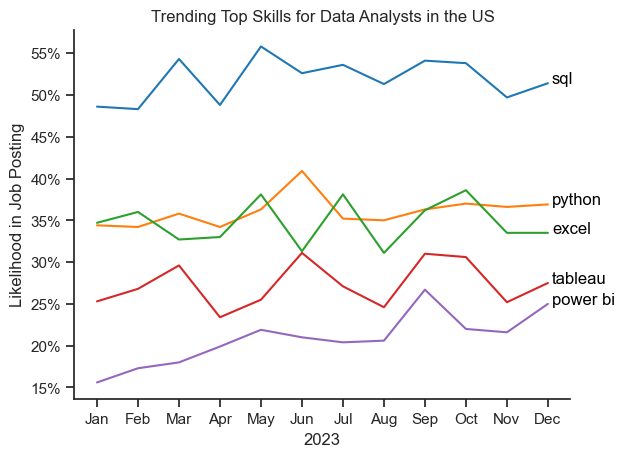

In [18]:
from matplotlib.ticker import PercentFormatter
import seaborn as sns

df_plot = df_da_india_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.1, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()